In [1]:
%load_ext autoreload

import sys
import numpy as np


%matplotlib ipympl
import matplotlib.pyplot as mpl

# import pydevd
# import ipdb

In [2]:
# One to One binding Functions
from Helpers.OneToOne import *

$$\frac{\sqrt{\text{koff} (8 \text{A0} \text{kon}+\text{koff})} \tanh \left(\frac{1}{2} t \sqrt{\text{koff} (8 \text{A0} \text{kon}+\text{koff})}+\tanh ^{-1}\left(\frac{4 \text{A0} \text{kon}+\text{koff}}{\sqrt{\text{koff} (8 \text{A0} \text{kon}+\text{koff})}}\right)\right)-\text{koff}}{4 \text{kon}}$$

In [3]:
np.arctanh(44.0+0j)

(0.022731187038378668+1.5707963267948966j)

In [4]:
Kd   = 1e-9
kon  = 1e6
koff = Kd*kon

A0 = 1e-6

print(SS_A(Kd=Kd,A0=A0))
print(SS_AA(Kd=Kd,A0=A0))
print(A(Kd=Kd,A0=A0,kon=kon,t=1e8))
print(A(Kd=Kd,A0=A0,kon=kon,t=[0,1e-5,1e5]))
print(AA(Kd=Kd,A0=A0,kon=kon,t=1e8))
print(AA(Kd=Kd,A0=A0,kon=kon,t=[0,1e-5,1e5]))

[2.21120773e-08]
[4.88943961e-07]
[2.21120773e-08]
[1.00000000e-06 9.99980000e-07 2.21120773e-08]
[4.88943961e-07]
[0.00000000e+00 9.99979995e-12 4.88943961e-07]


In [5]:
Kd   = 1e-9
kon  = 1e6
koff = Kd*kon

A0 = 1e-6
B0 = 1e-7

print(SS_A_AB(Kd=Kd,A0=A0,B0=B0))
print(SS_B_AB(Kd=Kd,A0=A0,B0=B0))
print(SS_AB(Kd=Kd,A0=A0,B0=B0))
print(SS_AB_2(Kd=Kd,A0=A0,B0=B0))
print(A_AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=1e4))
print(A_AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=[0,1e-3,10]))
print(B(Kd=Kd,A0=A0,B0=B0,kon=kon,t=1e4))
print(B(Kd=Kd,A0=A0,B0=B0,kon=kon,t=[0,1e-3,10]))
print(AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=1e4))
print(AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=[0,1e-3,10]))

[9.00110974e-07]
[1.10974123e-10]
[9.98890259e-08]
[9.98890259e-08]
[9.00110974e-07]
[1.00000000e-06 9.99900055e-07 9.00121937e-07]
[1.10974123e-10]
[1.00000000e-07 9.99000550e-08 1.21936769e-10]
[9.98890259e-08]
[0.00000000e+00 9.99449735e-11 9.98780632e-08]


In [6]:
%autoreload 2
from Helpers.ODERunPyV3 import ODEFunc
def Binding(
            Type, # AA or AB probably
            A0 = 0.0,
            B0 = 0.0,
            Kd = 1e-9,
#             Kd2 = 1e-9,
            Kp = 1e6,
            TimeLength = 1e2,
            TimeStart = -3,
            TimeStop = 12,
#             Normalized = False
            ):
    
#     pydevd.settrace('hexalith', port=12345, stdoutToServer=True, stderrToServer=True)
    Kd2 = Kd
    Func = ODEFunc()
    Func.GetSDataFromFiles("species{}".format(Type))
    Func.GetRDataFromFiles("react{}".format(Type))
    Func.SetTimeRange(TimeStart, TimeStop, TimeLength)
    # ODE Solver Params
    rtol = 1e-10 # Used 1e-8 for 2Static (1e-10 Normally)
    atol = 1e-20 # Used 1e-20 for 2Static (1e-25 Normally)
    mxstep=int(5e8)
    mxordn=int(5e7)
    mxords=int(5e7)
    hmin = 1e-50 # 0 means solver determined
    hmax = 1e20 # 0 means solver determined
    Func.GenCoef(
        Kd1 = Kd,
        Kd2 = Kd2,
        Kp  = Kp,
        A0  = A0,
        B0  = B0,
        Delta = 0.0 # No Synthesis or Degradation
        )
    Result, Message = Func.RunODEINT(
        ReturnOutMessage=True,
        rtol = rtol,
        atol = atol,
        mxstep = mxstep,
        mxordn = mxordn,
        mxords = mxords,
        hmin = hmin,
        hmax = hmax
        );
    if Message != 'Integration successful.': print("Integration Failure")
    ResultsWTime = np.zeros([Result.shape[0],Result.shape[1]+1],dtype=Result.dtype)
    ResultsWTime[:,0] = Func.Time
#     print (Func.Coef2D)

    for i in range(Result.shape[1]):
        ResultsWTime[:,i+1] = Result[:,i]
#         if Normalized:
#             ResultsWTime[:,i+1] = Result[:,i]/A0
#         else:
    return ResultsWTime

In [7]:
mpl.figure()

Index = 1

Kd   = 1e-9
kon  = 1e6
koff = Kd*kon

A0 = 1e-6
# B0 = 1e-7

CData = Binding("AA", A0 = A0, Kd = Kd, TimeStop=4)
Time  = CData[:,0]
AA(Kd=Kd,A0=A0,kon=kon,t=Time)

mpl.plot(Time, CData[:,1], alpha=0.5, label="A_Numerical: {}".format(Index))
mpl.plot(Time, CData[:,2], alpha=0.5, label="AA_Numerical: {}".format(Index))
mpl.plot(Time, CData[:,1]+CData[:,2]*2.0, alpha=0.5, label="Total_Numerical: {}".format(Index))
# mpl.plot(Time, A(Kd=Kd,A0=A0,kon=kon,t=Time), alpha=0.5, label="A_Analytic: {}".format(Index))
# mpl.plot(Time, AA(Kd=Kd,A0=A0,kon=kon,t=Time), alpha=0.5, label="AA_Analytic: {}".format(Index))
# mpl.plot(Time, A(Kd=Kd,A0=A0,kon=kon,t=Time)+2.0*AA(Kd=Kd,A0=A0,kon=kon,t=Time), alpha=0.5, label="Total_Analytic: {}".format(Index))
# mpl.plot(Time, CData[:,1] - A(Kd=Kd,A0=A0,kon=kon,t=Time), alpha=0.5, label="A_Diff: {}".format(Index))
# mpl.plot(Time, CData[:,2] - AA(Kd=Kd,A0=A0,kon=kon,t=Time), alpha=0.5, label="AA_Diff: {}".format(Index))

# print("Kd: {:.2e} ; A0: {:.2e} ; B0: {:.2e} ; A: {:.2e} ;  SS_A: {:.2e} ;  B: {:.2e} ; SS_B: {:.2e} ;  AB: {:.2e} ; SS_AB: {:.2e}".format(Kd, A0, B0, CData[-1,1], SS_A_AB(Kd, A0, B0)[0], CData[-1,2], SS_B_AB(Kd, A0, B0)[0], CData[-1,3], SS_AB(Kd, A0, B0)[0]))
mpl.legend()
mpl.semilogx()
# mpl.semilogy()
# mpl.xlim(1e-8,1e4)

/home/vatir/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

[]

In [8]:
mpl.figure()

Index = 1

Kd   = 1e-4
kon  = 1e6
koff = Kd*kon

A0 = 1e-5
B0 = 2e-5

CData = Binding("AB", A0 = A0, B0 = B0, Kd = Kd, TimeStop=15)
Time  = CData[:,0]
AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time)

# mpl.plot(Time, CData[:,1], alpha=0.5, label="A_Numerical: {}".format(Index))
# mpl.plot(Time, CData[:,2], alpha=0.5, label="B_Numerical: {}".format(Index))
# mpl.plot(Time, CData[:,3], alpha=0.5, label="AB_Numerical: {}".format(Index))
# mpl.plot(Time, CData[:,1]+CData[:,3], alpha=0.5, label="Total_A_Numerical: {}".format(Index))
# mpl.plot(Time, +CData[:,2]+CData[:,3], alpha=0.5, label="Total_B_Numerical: {}".format(Index))
# mpl.plot(Time, A_AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time), alpha=0.5, label="A_Analytic: {}".format(Index))
# mpl.plot(Time, B(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time), alpha=0.5, label="B_Analytic: {}".format(Index))
# mpl.plot(Time, AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time), alpha=0.5, label="AB_Analytic: {}".format(Index))
# mpl.plot(Time, A_AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time)+AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time), alpha=0.5, label="Total_A_Analytic: {}".format(Index))
# mpl.plot(Time, B(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time)+AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time), alpha=0.5, label="Total_B_Analytic: {}".format(Index))
# mpl.plot(Time, CData[:,1] - A_AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time), alpha=0.5, label="A_Diff: {}".format(Index))
# mpl.plot(Time, CData[:,2] - B(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time), alpha=0.5, label="B_Diff: {}".format(Index))
# mpl.plot(Time, CData[:,3] - AB(Kd=Kd,A0=A0,B0=B0,kon=kon,t=Time), alpha=0.5, label="AB_Diff: {}".format(Index))

# print("Kd: {:.2e} ; A0: {:.2e} ; B0: {:.2e} ; A: {:.2e} ;  SS_A: {:.2e} ;  B: {:.2e} ; SS_B: {:.2e} ;  AB: {:.2e} ; SS_AB: {:.2e}".format(Kd, A0, B0, CData[-1,1], SS_A_AB(Kd, A0, B0)[0], CData[-1,2], SS_B_AB(Kd, A0, B0)[0], CData[-1,3], SS_AB(Kd, A0, B0)[0]))
mpl.legend()
mpl.semilogx()
mpl.semilogy()


/home/vatir/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

No handles with labels found to put in legend.


[]

In [9]:
A0 = 1e-6
B0 = 1e-7

BData = Binding(
                Type="AB",
                A0 = A0,
                B0 = B0,
                Kd = 1e-9,
                TimeStop = 3
                );
#BDataN = BData/A0;
BData[(slice(None),(0,1))]; # Time and A
print(BData[0])
print(BData[-1])

[0.e+00 1.e-06 1.e-07 0.e+00]
[1.00000000e+03 9.00110974e-07 1.10974123e-10 9.98890259e-08]


In [10]:
#mpl.plot(Time, BDataN[:,0], alpha=1.0, label="A")
#mpl.plot(Time, BDataN[:,1], alpha=1.0, label="B")
#[mpl.plot(Time, Binding(x)[:,0], alpha=1.0, label="A: {}".format(x)) for x in np.logspace(-9,-3,10)]
Kd = 1e-8
mpl.figure()
for x in np.logspace(-9,-3,10):
# for x in [1e-6]:
    Kd = x
    A0 = 1e-6
    B0 = A0*10.0
    
    CData = Binding("AB", A0 = A0, B0 = B0, Kd = Kd, TimeStop=5)
    Time  = CData[:,0]
#     mpl.plot(Time, CData[:,1]/x, alpha=1.0, label="A: {}".format(x))
#     mpl.plot(Time, 2*CData[:,2]/x, alpha=1.0, label="B: {}".format(x))
#     mpl.plot(Time, SS_AB(Kd, x, x)[0]/x*np.ones(len(Time)), alpha=1.0, label="SS_AA: {}".format(x))
#     mpl.plot(Time, (CData[:,1] + 2.0*CData[:,2])/A0, alpha=1.0, label="Total: {}".format(x))
    print("Kd: {:.2e} ; A0: {:.2e} ; B0: {:.2e} ; A: {:.2e} ;  SS_A: {:.2e} ;  B: {:.2e} ; SS_B: {:.2e} ;  AB: {:.2e} ; SS_AB: {:.2e}".format(Kd, A0, B0, CData[-1,1], SS_A_AB(Kd, A0, B0)[0], CData[-1,2], SS_B_AB(Kd, A0, B0)[0], CData[-1,3], SS_AB(Kd, A0, B0)[0]))
# mpl.legend()
mpl.semilogx()

# mpl.semilogy()



/home/vatir/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

Kd: 1.00e-09 ; A0: 1.00e-06 ; B0: 1.00e-05 ; A: 1.11e-10 ;  SS_A: 1.11e-10 ;  B: 9.00e-06 ; SS_B: 9.00e-06 ;  AB: 1.00e-06 ; SS_AB: 1.00e-06
Kd: 4.64e-09 ; A0: 1.00e-06 ; B0: 1.00e-05 ; A: 5.15e-10 ;  SS_A: 5.15e-10 ;  B: 9.00e-06 ; SS_B: 9.00e-06 ;  AB: 9.99e-07 ; SS_AB: 9.99e-07
Kd: 2.15e-08 ; A0: 1.00e-06 ; B0: 1.00e-05 ; A: 2.39e-09 ;  SS_A: 2.39e-09 ;  B: 9.00e-06 ; SS_B: 9.00e-06 ;  AB: 9.98e-07 ; SS_AB: 9.98e-07
Kd: 1.00e-07 ; A0: 1.00e-06 ; B0: 1.00e-05 ; A: 1.10e-08 ;  SS_A: 1.10e-08 ;  B: 9.01e-06 ; SS_B: 9.01e-06 ;  AB: 9.89e-07 ; SS_AB: 9.89e-07
Kd: 4.64e-07 ; A0: 1.00e-06 ; B0: 1.00e-05 ; A: 4.88e-08 ;  SS_A: 4.88e-08 ;  B: 9.05e-06 ; SS_B: 9.05e-06 ;  AB: 9.51e-07 ; SS_AB: 9.51e-07
Kd: 2.15e-06 ; A0: 1.00e-06 ; B0: 1.00e-05 ; A: 1.90e-07 ;  SS_A: 1.90e-07 ;  B: 9.19e-06 ; SS_B: 9.19e-06 ;  AB: 8.10e-07 ; SS_AB: 8.10e-07
Kd: 1.00e-05 ; A0: 1.00e-06 ; B0: 1.00e-05 ; A: 5.12e-07 ;  SS_A: 5.12e-07 ;  B: 9.51e-06 ; SS_B: 9.51e-06 ;  AB: 4.88e-07 ; SS_AB: 4.88e-07
Kd: 4.64e-05 

[]

In [11]:
#mpl.plot(Time, BDataN[:,0], alpha=1.0, label="A")
#mpl.plot(Time, BDataN[:,1], alpha=1.0, label="B")
#[mpl.plot(Time, Binding(x)[:,0], alpha=1.0, label="A: {}".format(x)) for x in np.logspace(-9,-3,10)]
Kd = 1e-8
mpl.figure()
for x in np.logspace(-9,-3,10):
# for x in [1e-6]:
    A0 = 1e-6
    Kd = x
    CData = Binding("AA", A0 = A0, Kd = Kd, TimeStop=10)
    Time  = CData[:,0]
#     mpl.plot(Time, CData[:,1]/x, alpha=1.0, label="A: {}".format(x))
#     mpl.plot(Time, 2*CData[:,2]/x, alpha=1.0, label="B: {}".format(x))
#     mpl.plot(Time, SS_AB(Kd, x, x)[0]/x*np.ones(len(Time)), alpha=1.0, label="SS_AA: {}".format(x))
#     mpl.plot(Time, (CData[:,1] + 2.0*CData[:,2])/A0, alpha=1.0, label="Total: {}".format(x))
    print("Kd: {:.2e} ; A0: {:.2e} ; A: {:.2e} ; SS_A: {:.2e} : AA: {:.2e} ; SS_AA: {:.2e}".format(Kd, A0, CData[-1,1], SS_A(Kd, A0)[0], CData[-1,2], SS_AA(Kd, A0)[0]))
# mpl.legend()
mpl.semilogx()

# mpl.semilogy()



/home/vatir/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:932: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


FigureCanvasNbAgg()

Kd: 1.00e-09 ; A0: 1.00e-06 ; A: 2.21e-08 ; SS_A: 2.21e-08 : AA: 4.89e-07 ; SS_AA: 4.89e-07
Kd: 4.64e-09 ; A0: 1.00e-06 ; A: 4.70e-08 ; SS_A: 4.70e-08 : AA: 4.76e-07 ; SS_AA: 4.76e-07
Kd: 2.15e-08 ; A0: 1.00e-06 ; A: 9.85e-08 ; SS_A: 9.85e-08 : AA: 4.51e-07 ; SS_AA: 4.51e-07
Kd: 1.00e-07 ; A0: 1.00e-06 ; A: 2.00e-07 ; SS_A: 2.00e-07 : AA: 4.00e-07 ; SS_AA: 4.00e-07
Kd: 4.64e-07 ; A0: 1.00e-06 ; A: 3.79e-07 ; SS_A: 3.79e-07 : AA: 3.10e-07 ; SS_AA: 3.10e-07
Kd: 2.15e-06 ; A0: 1.00e-06 ; A: 6.31e-07 ; SS_A: 6.31e-07 : AA: 1.85e-07 ; SS_AA: 1.85e-07
Kd: 1.00e-05 ; A0: 1.00e-06 ; A: 8.54e-07 ; SS_A: 8.54e-07 : AA: 7.29e-08 ; SS_AA: 7.29e-08
Kd: 4.64e-05 ; A0: 1.00e-06 ; A: 9.60e-07 ; SS_A: 9.60e-07 : AA: 1.99e-08 ; SS_AA: 1.99e-08
Kd: 2.15e-04 ; A0: 1.00e-06 ; A: 9.91e-07 ; SS_A: 9.91e-07 : AA: 4.56e-09 ; SS_AA: 4.56e-09
Kd: 1.00e-03 ; A0: 1.00e-06 ; A: 9.98e-07 ; SS_A: 9.98e-07 : AA: 9.96e-10 ; SS_AA: 9.96e-10


[]

In [12]:
CData[-1]

array([1.00000000e+10, 9.98007960e-07, 9.96019889e-10])

In [13]:
SS_AB(Kd, x, x)[0]

0.0003819660112501051

In [14]:
from sympy import *
from sympy import Function, dsolve, Eq, Derivative, symbols, sin, cos, tan, tanh
init_printing()

\int e^{x} \cos{\left (x \right )}\, dx = \frac{e^{x}}{2} \sin{\left (x \right )} + \frac{e^{x}}{2} \cos{\left (x \right )}


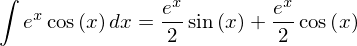

In [15]:
x = symbols('x')
a = Integral(cos(x)*exp(x),x)

print(latex(Eq(a,a.doit())))
Eq(a,a.doit())

In [16]:
t = symbols('t', real = True, nonnegative=True)
kon = symbols('k_{on}', real = True, nonnegative=True, constant = True)
koff = symbols('k_{off}', real = True, nonnegative=True, constant = True)
kd = symbols('K_d', real = True, nonnegative=True, constant = True)
A0 = symbols('A_0', real = True, nonnegative=True, constant = True)
A = Function('A', real=True, nonnegative=True)
AA = Function('AA', real=True, nonnegative=True)

eq = [
    Eq(A(t).diff(t),2*koff*AA(t) - 2*kon*A(t)**2),
    Eq(AA(t).diff(t),-koff*AA(t) + kon*A(t)**2)
]


In [17]:
classify_ode(
    eq,
    [A, AA],
    ics={
        A(0): A0,
        AA(0): 0
    }
)

AttributeError: 'list' object has no attribute 'args'

In [ ]:
eq

In [ ]:
t.assumptions0

In [ ]:
t = symbols('t')
kon = symbols('k_{on}')
koff = symbols('k_{off}')
kd = symbols('K_d')
A0 = symbols('A_0')
A = Function('[A]')
AA = Function('[AA]')

eq = [
    -Derivative(A(t),t)+2*koff*AA(t) - 2*(kon*A(t))**2,
    -Derivative(AA(t),t)-koff*AA(t) + kon*(A(t))**2
]

eqEq = [
    Eq(Derivative(A(t),t),2*koff*AA(t) - 2*(kon*A(t))**2),
    Eq(Derivative(AA(t),t),-koff*AA(t) + kon*(A(t))**2)
]

# eq = [
#     -A.diff(t),2*koff*AA - 2*kon*A**2,
#     -AA.diff(t),-koff*AA + kon*A**2
# ]


In [ ]:
eqEq

In [ ]:
dsolve(
    eq, hint="all"
)

In [ ]:
ode_order(eq)

In [ ]:
eq[0]

In [ ]:
t = symbols('t', real = True, nonnegative=True)
kon = symbols('k_{on}', real = True, nonnegative=True)
koff = symbols('k_{off}', real = True, nonnegative=True)
kd = symbols('K_d', real = True, nonnegative=True)
A0 = symbols('A_0', real = True, nonnegative=True)
B0 = symbols('B_0', real = True, nonnegative=True)
A = Function('[A]', real = True, nonnegative=True)
B = Function('[B]', real = True, nonnegative=True)
AB = Function('[AB]', real = True, nonnegative=True)

eqEq = [
    Eq(Derivative(A(t),t),koff*AB(t) - kon*(A0-AB(t))*(B0-AB(t))),
    Eq(Derivative(B(t),t),koff*AB(t) - kon*(A0-AB(t))*(B0-AB(t))),
    Eq(Derivative(AB(t),t),-koff*AB(t) + kon*(A0-AB(t))*(B0-AB(t)))
]
# A0 == A(t)+AB(t)
# B0 == B(t)+AB(t)

# eq = [
#     -A.diff(t),2*koff*AA - 2*kon*A**2,
#     -AA.diff(t),-koff*AA + kon*A**2
# ]


In [ ]:
eqEq

In [ ]:
Sol = dsolve(eqEq,
            [A(t),B(t),AB(t)],
            ics = {
                A(0): A0,
                B(0): B0,
                AB(0): 0
            })

In [ ]:
classify_ode(eqEq)

In [ ]:
Sol